# FASHION MNIST
- **Fashion MNIST Dataset**: a dataset of Zalando's article images-consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST Dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.
- **Goal**: classify grayscale Fashion-MNIST images into 10 classes.

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
import random
from typing import Optional

## 1. Load Data

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [3]:
type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [4]:
X_train.dtype, y_train.dtype

(dtype('uint8'), dtype('uint8'))

In [5]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [6]:
class_names = [
    "T_shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]
class_nums = len(class_names)

In [7]:
class_nums

10

In [8]:
def plot_data(
    x_data: np.ndarray, y_data: np.ndarray, y_pred: Optional[np.ndarray] = None
) -> None:
    nrows, ncols = 3, 3
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8, 5))
    len_x = x_data.shape[0]
    color = "blue"
    for row in range(nrows):
        for col in range(ncols):
            ax = axes[row, col]
            img_idx = random.randint(0, len_x)
            ax.imshow(x_data[img_idx], cmap="gray")
            ax.set(xticks=[], yticks=[])

            true_label = "True Label: {}".format(class_names[y_data[img_idx]])

            if y_pred is not None:
                pred_idx = np.argmax(y_pred[img_idx])
                pred_label = class_names[pred_idx]
                color = "red" if pred_idx != y_data[img_idx] else "blue"
                pred_label_str = "\nPredict: {}".format(pred_label)

            img_title = true_label if y_pred is None else true_label + pred_label_str
            ax.set_xlabel(img_title, color=color, fontsize=8)

    plt.tight_layout()

    plt.show()

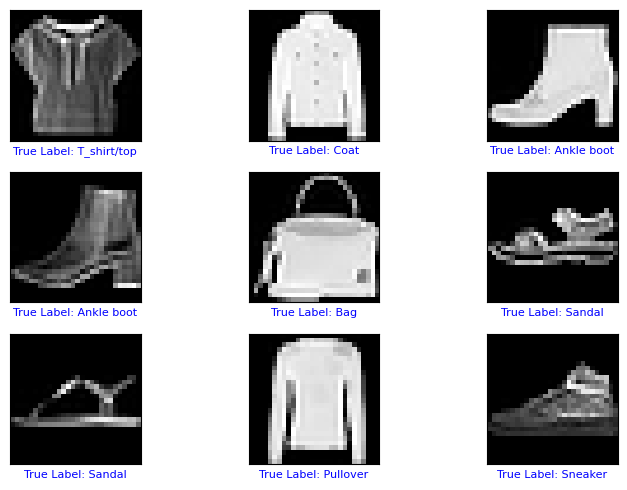

In [9]:
plot_data(X_train, y_train)

## 2. Image Pre-Processing
- Reshaping it into the shape the model expects and scaling it so that all values are in the `[0, 1]` interval
- Transform dtype from `uint8` into `float32`

In [10]:
# Convert to float32 & Scale images to the [0, 1] range for training
X_train = X_train.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255

In [11]:
X_train.dtype, X_test.dtype

(dtype('float32'), dtype('float32'))

In [12]:
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

In [13]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [14]:
# Convert class vectors to binary class matrices: 1 -> [0, 1, 0, 0 ...]
# 1                -> sparse_categorical_crossentropy
# [0, 1, 0, 0 ...] -> categorical_crossentropy

y_train_label = keras.utils.to_categorical(y_train, class_nums)
y_test_label = keras.utils.to_categorical(y_test, class_nums)

In [15]:
y_train[0], y_train_label[0]

(9, array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]))

## 3. Network (ANN) Architecture

In [16]:
input_shape = (28, 28, 1)

In [17]:
model = keras.models.Sequential(
    [
        layers.Input(shape=input_shape),  # Define the input shape
        layers.Flatten(),  # Flatten the input
        layers.Dense(512, activation="relu"),  # Fully connected layer
        layers.Dense(256, activation="relu"),  # Fully connected layer
        layers.Dense(
            class_nums, activation="softmax"
        ),  # Output layer with softmax activation
    ]
)

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(
    optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"]
)

In [20]:
epochs = 20
batch_size = 128

In [21]:
history = model.fit(
    X_train, y_train_label, epochs=epochs, batch_size=batch_size, validation_split=0.1
)

Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7287 - loss: 0.7440 - val_accuracy: 0.8202 - val_loss: 0.4907
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8526 - loss: 0.3935 - val_accuracy: 0.8663 - val_loss: 0.3551
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8720 - loss: 0.3435 - val_accuracy: 0.8647 - val_loss: 0.3719
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8837 - loss: 0.3080 - val_accuracy: 0.8840 - val_loss: 0.3164
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8928 - loss: 0.2858 - val_accuracy: 0.8750 - val_loss: 0.3490
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8987 - loss: 0.2681 - val_accuracy: 0.8895 - val_loss: 0.3201
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9025 - loss: 0.2570 - val_accuracy: 0.8887 - val_loss: 0.3291
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9063 - loss: 0.2461 - val_accuracy: 0.

In [22]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [23]:
train_acc = history_dict["accuracy"]
train_loss = history_dict["loss"]
val_acc = history_dict["val_accuracy"]
val_loss = history_dict["val_loss"]

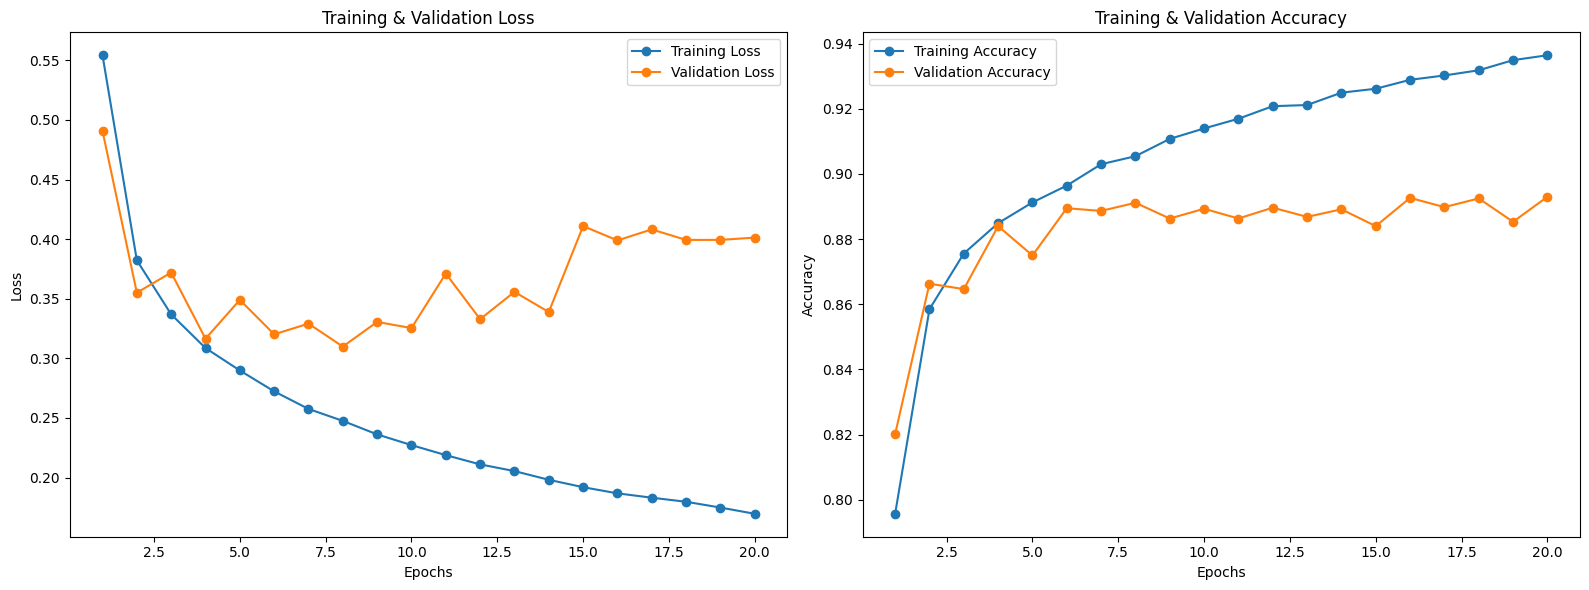

In [24]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

epochs_runs = [i + 1 for i in range(epochs)]

ax1.plot(epochs_runs, train_loss, label="Training Loss", marker="o")
ax1.plot(epochs_runs, val_loss, label="Validation Loss", marker="o")
ax1.set(title="Training & Validation Loss", xlabel="Epochs", ylabel="Loss")
ax1.legend()

ax2.plot(epochs_runs, train_acc, label="Training Accuracy", marker="o")
ax2.plot(epochs_runs, val_acc, label="Validation Accuracy", marker="o")
ax2.set(title="Training & Validation Accuracy", xlabel="Epochs", ylabel="Accuracy")
ax2.legend()

plt.tight_layout()
plt.show()

## 4. Model Evaluation

In [25]:
score = model.evaluate(X_test, y_test_label)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - accuracy: 0.8892 - loss: 0.4312


In [26]:
print("Test Loss: {}".format(score[0]))
print("Test Accuracy: {}".format(score[1]))

Test Loss: 0.4232746660709381
Test Accuracy: 0.8906000256538391


## 5. Prediction (Classification)

In [27]:
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step


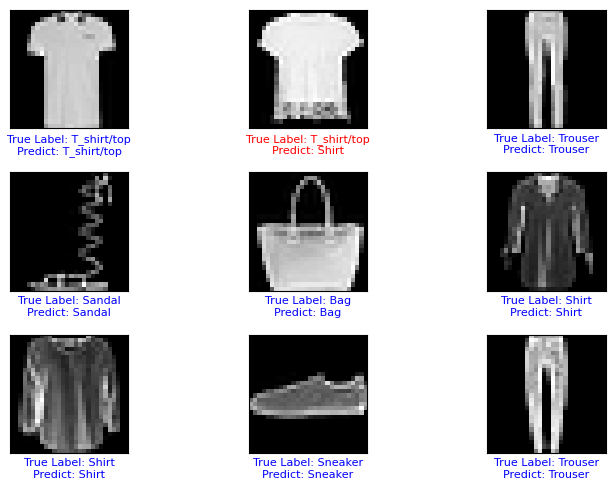

In [28]:
plot_data(X_test, y_test, y_pred)